# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Imports
import gmaps
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as st
from scipy.stats import linregress

import json
import requests
from random import uniform

from citipy import citipy
import time

# API keys
from api_keys import g_key, weather_key

# Configure gmaps
gmaps.configure(api_key = g_key)

## Generate Cities List

In [2]:
# Get list of random latitudes and longitudes
lat = np.random.uniform(-90,90,1500)
lng = np.random.uniform(-180,180,1500)

In [3]:
# Zip lat & lng into tupled list
coords = list(zip(lat,lng))
len(coords)

1500

In [4]:
# Convert random coordinates into list of cities + details
# for x in coords: 
cities = []
countries = []
comma = ","
for x in coords:
    city = citipy.nearest_city(x[0], x[1])
    cities.append(city.city_name)
    countries.append(city.country_code)

# Convert list to df
df = pd.DataFrame(list(zip(cities,countries)),columns=["City","Country"])
df.count()

City       1500
Country    1500
dtype: int64

In [5]:
# Clean df of repeat cities
clean_df = df.drop_duplicates(subset="City")
clean_df.count()

City       609
Country    609
dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
cities_json = []
temps_json = []
humid_json = []
clouds_json = []
winds_json = []
lng_json = []
lat_json = []
countries_json = []
max_temp_json = []

for index,row in clean_df.iterrows():
    city = row["City"]
    query_url = weather_url + "appid=" + weather_key + "&q=" + city + "&units=" + units 
    print(f"Processing results to Index {index}: ({city})")
    try:
        response = requests.get(query_url).json()
        time.sleep(1)
        temps_json.append(response["main"]["temp"])
        max_temp_json.append(response["main"]["temp_max"])
        cities_json.append(response["name"])
        countries_json.append(response["sys"]["country"])
        humid_json.append(response["main"]["humidity"])
        clouds_json.append(response["clouds"]["all"])
        winds_json.append(response["wind"]["speed"])
        lng_json.append(response["coord"]["lon"])
        lat_json.append(response["coord"]["lat"])
    
    except (KeyError, IndexError):
        print(f"{city} not found")
        pass

Processing results to Index 0: (saint anthony)
Processing results to Index 1: (mataura)
Processing results to Index 2: (coquimbo)
Processing results to Index 3: (albany)
Processing results to Index 4: (chuy)
Processing results to Index 5: (bredasdorp)
Processing results to Index 6: (altona)
Processing results to Index 7: (petauke)
Processing results to Index 8: (hermanus)
Processing results to Index 9: (rikitea)
Processing results to Index 10: (punta arenas)
Processing results to Index 12: (saint-philippe)
Processing results to Index 13: (kapaa)
Processing results to Index 14: (eydhafushi)
Processing results to Index 15: (butaritari)
Processing results to Index 16: (nemuro)
Processing results to Index 17: (ushuaia)
Processing results to Index 18: (hobart)
Processing results to Index 19: (klaksvik)
Processing results to Index 20: (hamilton)
Processing results to Index 22: (marsa matruh)
Processing results to Index 23: (sawtell)
Processing results to Index 24: (georgetown)
Processing res

In [7]:
### Convert Raw Data to DataFrame
# Display the DataFrame
pre_weather_df = pd.DataFrame(list(zip(cities_json,countries_json,temps_json,max_temp_json,humid_json,clouds_json,winds_json,lat_json,lng_json)),
                          columns=["City","Country","Temperature","Max Temp","Humidity %","Cloudiness %","Wind Speed (mph)","Latitude","Longitude"])
pre_weather_df

,City,Country,Temperature,Max Temp,Humidity %,Cloudiness %,Wind Speed (mph),Latitude,Longitude
0,Saint Anthony,US,73.90,76.93,55,1,7.00,45.0205,-93.2180
1,Mataura,NZ,49.48,49.48,71,100,6.20,-46.1927,168.8643
2,Coquimbo,CL,62.33,62.33,59,0,19.57,-29.9533,-71.3436
3,Albany,US,73.08,77.31,56,0,6.98,42.6001,-73.9662
4,Chui,UY,59.94,59.94,68,6,9.73,-33.6971,-53.4616
...,...,...,...,...,...,...,...,...,...
561,Koróni,GR,78.51,79.07,66,91,9.06,36.8000,21.9500
562,Pidhorodne,UA,52.84,52.84,41,72,8.32,48.5753,35.1068
563,Mossendjo,CG,72.77,72.77,77,48,1.72,-2.9506,12.7261
564,Naze,JP,79.25,79.25,83,98,6.06,28.3667,129.4833


In [36]:
# Purge data of duplicates
weather_data = pre_weather_df.drop_duplicates()
weather_data

,City,Country,Temperature,Max Temp,Humidity %,Cloudiness %,Wind Speed (mph),Latitude,Longitude
0,Saint Anthony,US,73.90,76.93,55,1,7.00,45.0205,-93.2180
1,Mataura,NZ,49.48,49.48,71,100,6.20,-46.1927,168.8643
2,Coquimbo,CL,62.33,62.33,59,0,19.57,-29.9533,-71.3436
3,Albany,US,73.08,77.31,56,0,6.98,42.6001,-73.9662
4,Chui,UY,59.94,59.94,68,6,9.73,-33.6971,-53.4616
...,...,...,...,...,...,...,...,...,...
561,Koróni,GR,78.51,79.07,66,91,9.06,36.8000,21.9500
562,Pidhorodne,UA,52.84,52.84,41,72,8.32,48.5753,35.1068
563,Mossendjo,CG,72.77,72.77,77,48,1.72,-2.9506,12.7261
564,Naze,JP,79.25,79.25,83,98,6.06,28.3667,129.4833


In [37]:
# Export the city data into a .csv
weather_data.to_csv(r'./Resources/Weather_Data.csv', index = True)

In [38]:
# Export the city data into html
weather_data.to_html(r'./Resources/Weather_Data.html', index = True)

# Read data from created csv

In [39]:
weather_df = pd.read_csv('./Resources/Weather_Data.csv')

In [40]:
type(weather_df)

pandas.core.frame.DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [41]:
# Get the indices of cities that have humidity over 100%.
humid_100 = weather_df.loc[weather_df["Humidity %"]>= 100,:]
humid_100.index

Int64Index([25, 108, 167, 169, 188, 309, 337, 343], dtype='int64')

In [42]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
labels = humid_100.index
clean_city_data = weather_df.drop(index=labels,inplace=False)
clean_city_data

,Unnamed: 0,City,Country,Temperature,Max Temp,Humidity %,Cloudiness %,Wind Speed (mph),Latitude,Longitude
0,0,Saint Anthony,US,73.90,76.93,55,1,7.00,45.0205,-93.2180
1,1,Mataura,NZ,49.48,49.48,71,100,6.20,-46.1927,168.8643
2,2,Coquimbo,CL,62.33,62.33,59,0,19.57,-29.9533,-71.3436
3,3,Albany,US,73.08,77.31,56,0,6.98,42.6001,-73.9662
4,4,Chui,UY,59.94,59.94,68,6,9.73,-33.6971,-53.4616
...,...,...,...,...,...,...,...,...,...,...
561,561,Koróni,GR,78.51,79.07,66,91,9.06,36.8000,21.9500
562,562,Pidhorodne,UA,52.84,52.84,41,72,8.32,48.5753,35.1068
563,563,Mossendjo,CG,72.77,72.77,77,48,1.72,-2.9506,12.7261
564,564,Naze,JP,79.25,79.25,83,98,6.06,28.3667,129.4833


## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

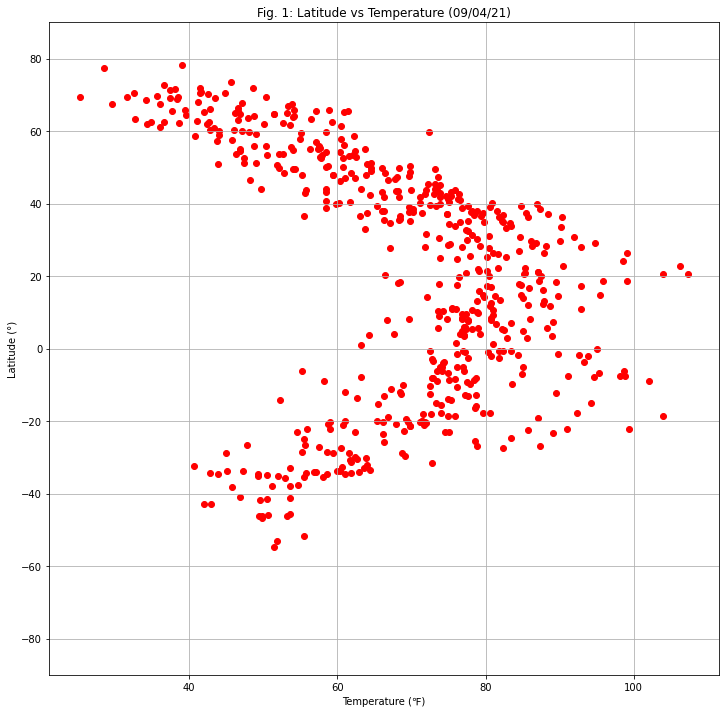

In [43]:
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
fig1 = plt.figure(figsize =(12, 12))

clean_city_temp = clean_city_data["Temperature"]
clean_city_temp

clean_city_lat = clean_city_data["Latitude"]
clean_city_lat

lat_temp_scatter =  plt.scatter(clean_city_temp, clean_city_lat, color="red")

plt.ylabel(u"Latitude (°)")
plt.ylim(-90,90)
plt.xlabel(u"Temperature (℉)")
plt.title("Fig. 1: Latitude vs Temperature (09/04/21)")
plt.grid()

# Save the plotted figures as .jpg
plt.savefig(r'./Resources/assets/images/Weather_Fig1.jpg', pad_inches=0.2, dpi=72, bbox_inches='tight')
plt.show

#### Analysis: This scatter plot is a verticle slice of Planet Earth. The x ("Temperature) axis marks the temperature of cities around the world. Traveling our y "Latitude" axis north (80) to the equator (0) then south (-60), the temperature increases and peaks around 20-0 degrees. 

#### Cities closer to the equator generally have higher temperatures. The reason temperatures peak at 20-0 degrees, insted of 0 degrees is due to the tilt of the earth's axis by about 23 degrees.

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

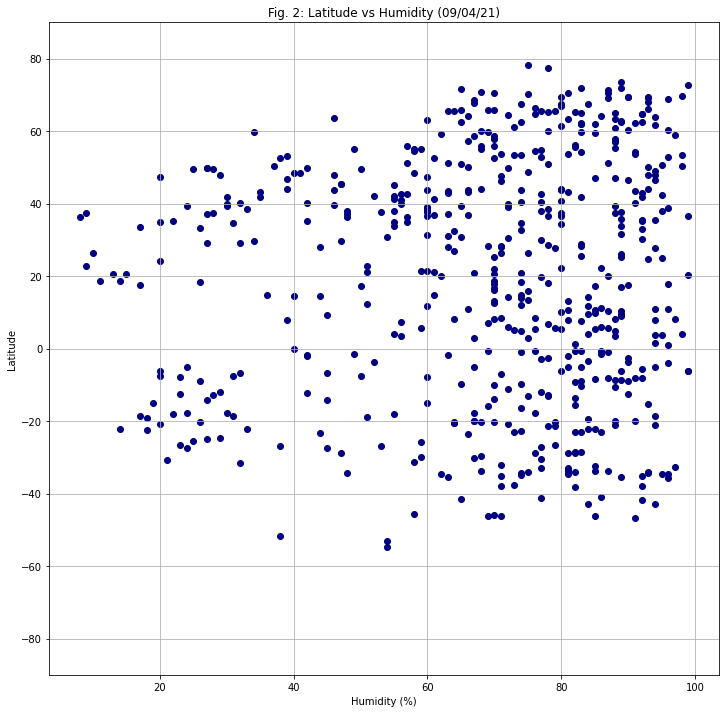

In [44]:
fig2 = plt.figure(figsize =(12, 12))

clean_city_humi = clean_city_data["Humidity %"]
clean_city_humi

clean_city_lat = clean_city_data["Latitude"]
clean_city_lat

lat_humi_scatter =  plt.scatter( clean_city_humi, clean_city_lat, color="navy")

plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlabel(u"Humidity (%)")
plt.title("Fig. 2: Latitude vs Humidity (09/04/21)")
plt.grid()

# Save the plotted figures as .jpg
plt.savefig(r'./Resources/assets/images/Weather_Fig2.jpg',pad_inches=0.2, dpi=72, bbox_inches='tight')
plt.show

#### Analysis: This scatter plot is a verticle slice of Planet Earth. The x ("Humidity") axis marks the amount water vapor in the air of cities around the world. Humidity is distributed across latitudes and weighted toward 70%. Cities nearest the equator (10 degrees to -10 degrees) have a less even distribution of humidity, weighted more strongly toward 70-80% humidity. Additional data reveals several outliers cities with lower humidity percents around 6-16.

Humidity outliers = [ 8  9 15 13 14 17 11 17 10 14 17  9]


<function matplotlib.pyplot.show(close=None, block=None)>

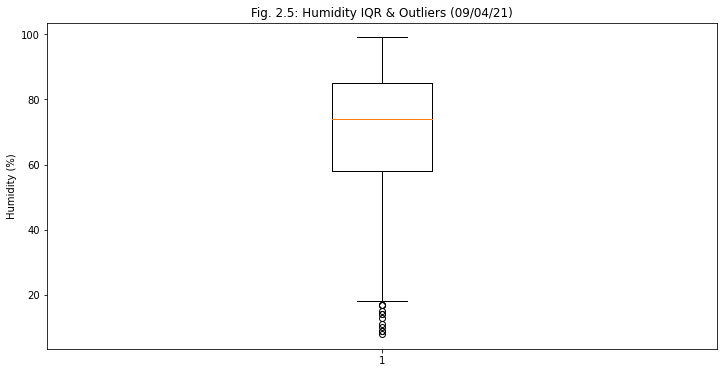

In [45]:
fig2_5 = plt.figure(figsize =(12, 6))

# Determine outliers using upper and lower bounds
quartiles = clean_city_humi.quantile([.25,.5,.75])
lowq = quartiles[.25]
upq = quartiles[.75]
inqr = upq - lowq
lower_bound = lowq - (1.5*inqr)
upper_bound = upq + (1.5*inqr)
outliers = clean_city_humi.loc[(clean_city_humi<lower_bound)|(clean_city_humi>upper_bound)]
print(f"Humidity outliers = {outliers.values}")

plt.boxplot(clean_city_humi)

plt.ylabel(u"Humidity (%)")
plt.title("Fig. 2.5: Humidity IQR & Outliers (09/04/21)")

# Save the plotted figures as .jpg
plt.savefig(r'./Resources/assets/images/Weather_Fig2q.jpg',pad_inches=0.2, dpi=72, bbox_inches='tight')
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

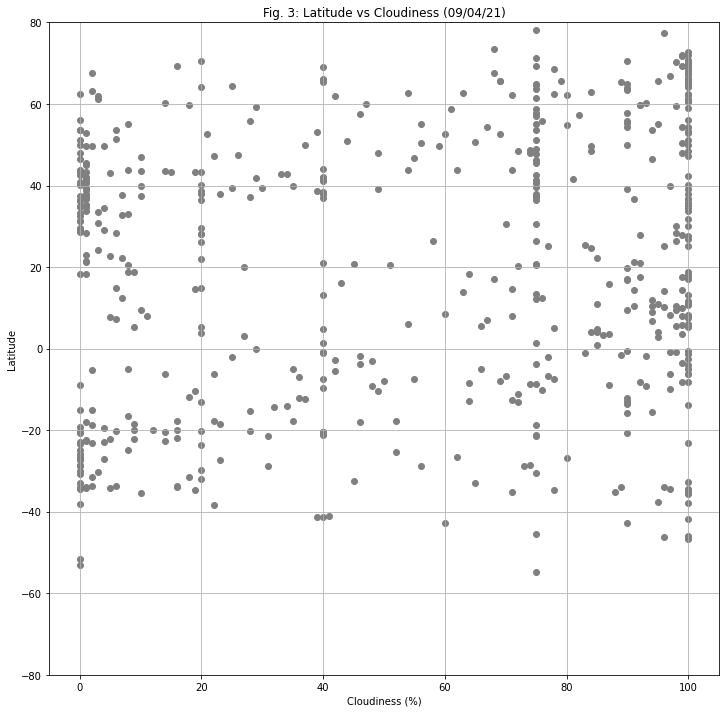

In [46]:
fig3 = plt.figure(figsize =(12, 12))

clean_city_clou = clean_city_data["Cloudiness %"]
clean_city_clou

clean_city_lat = clean_city_data["Latitude"]
clean_city_lat

lat_cloud_scatter =  plt.scatter(clean_city_clou, clean_city_lat, color="grey")

plt.ylabel("Latitude")
plt.ylim(-80,80)
plt.xlabel(u"Cloudiness (%)")
plt.title("Fig. 3: Latitude vs Cloudiness (09/04/21)")
plt.grid()

# Save the plotted figures as .jpgs
fig3.savefig(r'./Resources/assets/images/Weather_Fig3.jpg',pad_inches=0.2, dpi=72, bbox_inches='tight')
plt.show

#### Analysis: This scatter plot is a verticle slice of Planet Earth. The x ("Cloudiness %") axis marks the fraction of the sky obscured by clouds in cities around the world. Cloudiness percent is farely evenly distributed across latitudes and weighted toward the ends at 0% and 100%. 

Cloudiness outliers = []


<function matplotlib.pyplot.show(close=None, block=None)>

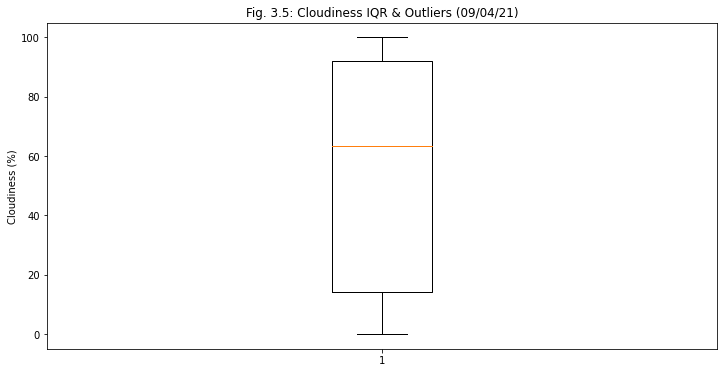

In [47]:
fig3_5 = plt.figure(figsize =(12, 6))

# Determine outliers using upper and lower bounds
quartiles = clean_city_clou.quantile([.25,.5,.75])
lowq = quartiles[.25]
upq = quartiles[.75]
inqr = upq - lowq
lower_bound = lowq - (1.5*inqr)
upper_bound = upq + (1.5*inqr)

outliers_2 = clean_city_humi.loc[(clean_city_clou<lower_bound)|(clean_city_clou>upper_bound)]
print(f"Cloudiness outliers = {outliers_2.values}")

plt.boxplot(clean_city_clou)

plt.ylabel(u"Cloudiness (%)")
plt.title("Fig. 3.5: Cloudiness IQR & Outliers (09/04/21)")

# Save the plotted figures as .jpgs
plt.savefig(r'./Resources/assets/images/Weather_Fig3q.jpg',pad_inches=0.2, dpi=72, bbox_inches='tight')
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

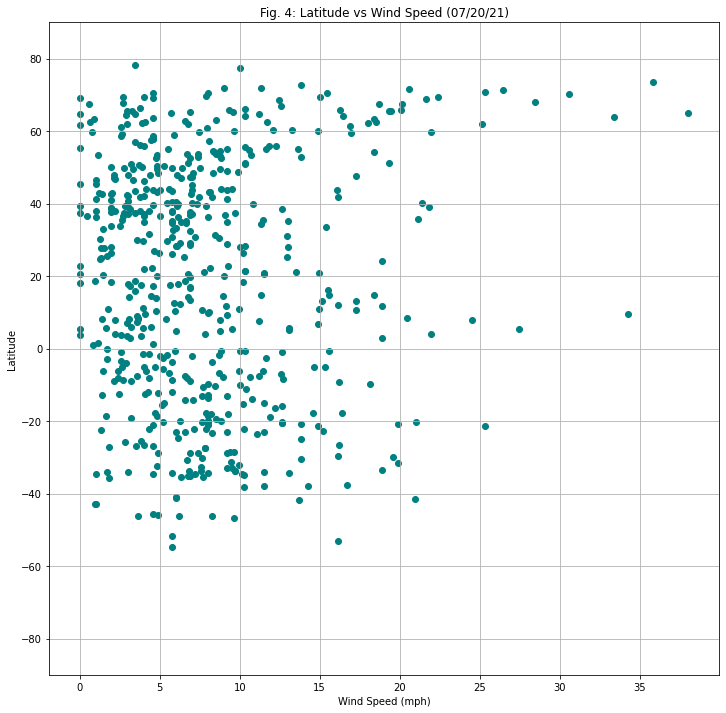

In [48]:
fig4 = plt.figure(figsize =(12, 12))

clean_city_wind = clean_city_data["Wind Speed (mph)"]
clean_city_wind

clean_city_lat = clean_city_data["Latitude"]
clean_city_lat

lat_temp_scatter =  plt.scatter(clean_city_wind, clean_city_lat, color="teal")

plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlabel(u"Wind Speed (mph)")
plt.title("Fig. 4: Latitude vs Wind Speed (07/20/21)")
plt.grid()

# Save the plotted figures as .jpgs
plt.savefig(r'./Resources/assets/images/Weather_Fig4.jpg',pad_inches=0.2, dpi=72, bbox_inches='tight')
plt.show

#### Analysis: This scatter plot is a verticle slice of Planet Earth. The x ("Wind Speed") axis marks the speed of wind in miles per hour in cities around the world; 20-30 mph is considered "windy". There is a weak relationship between Wind Speed and Latitude. Winds speeds are distributed evenly across latitudes with the majority of wind speeds plotted from 0-10 mph.  

## Linear Regression

In [49]:
# Separate data into Northern Hemisphere >= 0 degrees latitude and Southern Hemisphere < 0 degrees latitude)
North_Hem_data = clean_city_data.loc[clean_city_data["Latitude"]>=0]
South_Hem_data = clean_city_data.loc[clean_city_data["Latitude"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [50]:
North_Hem_data.columns

Index(['Unnamed: 0', 'City', 'Country', 'Temperature', 'Max Temp',
       'Humidity %', 'Cloudiness %', 'Wind Speed (mph)', 'Latitude',
       'Longitude'],
      dtype='object')

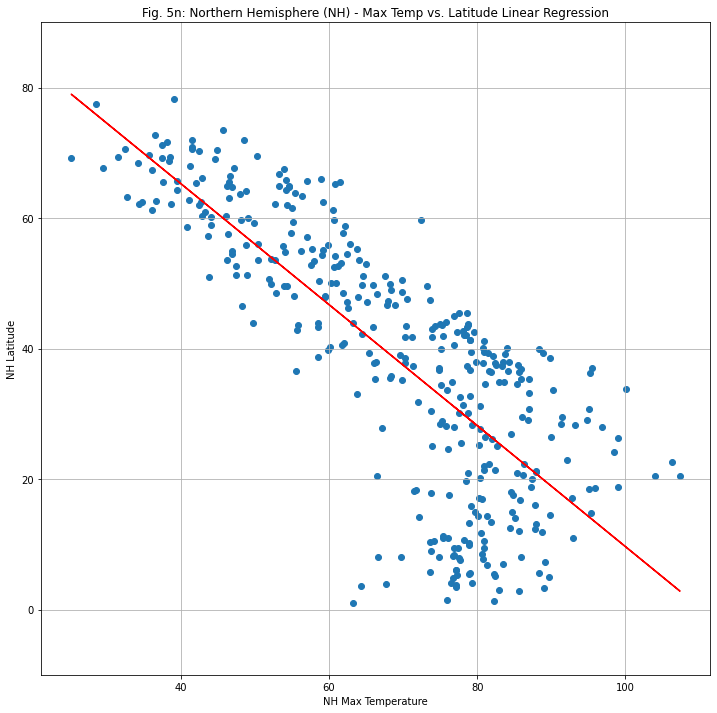

The correlation between max temperature and latitude is -0.78


In [52]:
fig_5n = plt.figure(figsize =(12, 12))

NH_max_temp = North_Hem_data['Max Temp']
NH_max_temp

NH_lat = North_Hem_data['Latitude']
NH_lat

x_values = NH_max_temp
y_values = NH_lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="pink")
plt.xlabel("NH Max Temperature")
plt.ylabel("NH Latitude")
plt.ylim(-10,90)
plt.grid()
plt.title("Fig. 5n: Northern Hemisphere (NH) - Max Temp vs. Latitude Linear Regression")

# Save the plotted figures as .jpgs
plt.savefig(r'./Resources/assets/images/Weather_Fig5n.jpg', pad_inches=0.2, dpi=72, bbox_inches='tight')
plt.show()

# Calculate the correlation coefficient
correlation_NH_temp = st.pearsonr(NH_max_temp,NH_lat)
print(f"The correlation between max temperature and latitude is {round(correlation_NH_temp[0],2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

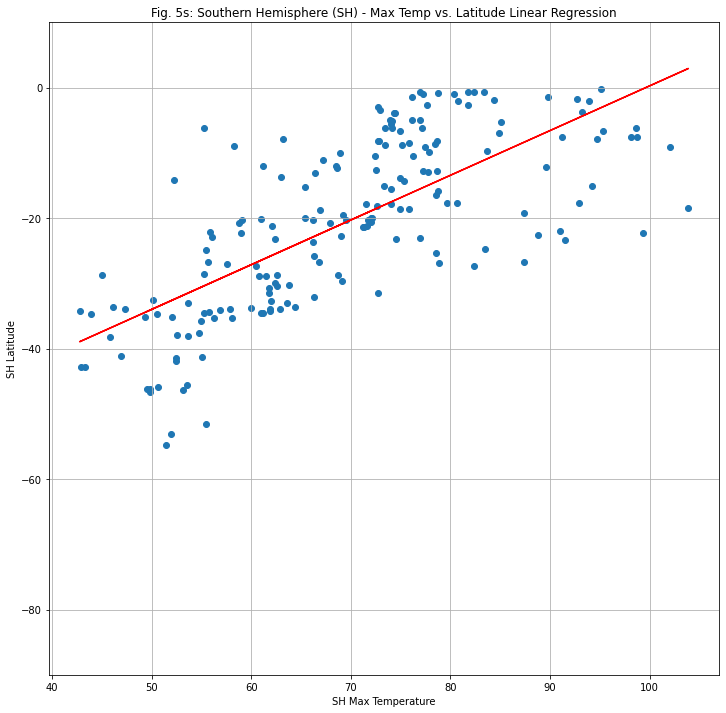

The correlation between max temperature and latitude is 0.72


In [53]:
fig_5s = plt.figure(figsize =(12, 12))

SH_max_temp = South_Hem_data['Max Temp']
SH_max_temp

SH_lat = South_Hem_data['Latitude']
SH_lat

x_values = SH_max_temp
y_values = SH_lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="pink")
plt.xlabel("SH Max Temperature")
plt.ylabel("SH Latitude")
plt.ylim(-90,10)
plt.grid()
plt.title("Fig. 5s: Southern Hemisphere (SH) - Max Temp vs. Latitude Linear Regression")

# Save the plotted figures as .jpgs
plt.savefig(r'./Resources/assets/images/Weather_Fig5s.jpg', pad_inches=0.2, dpi=72, bbox_inches='tight')
plt.show()

# Calculate the correlation coefficient
correlation_SH_temp = st.pearsonr(SH_max_temp,SH_lat)
print(f"The correlation between max temperature and latitude is {round(correlation_SH_temp[0],2)}")

#### Analysis: Scatter plots 5n and 5s show a strong correlation between the Latitude and Max Temperature. 

#### Figure 5n shows max temperatures increase for cities placed near to the equator. 

#### Figure 5s shows max temperatures decrease for cities placed further away from the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

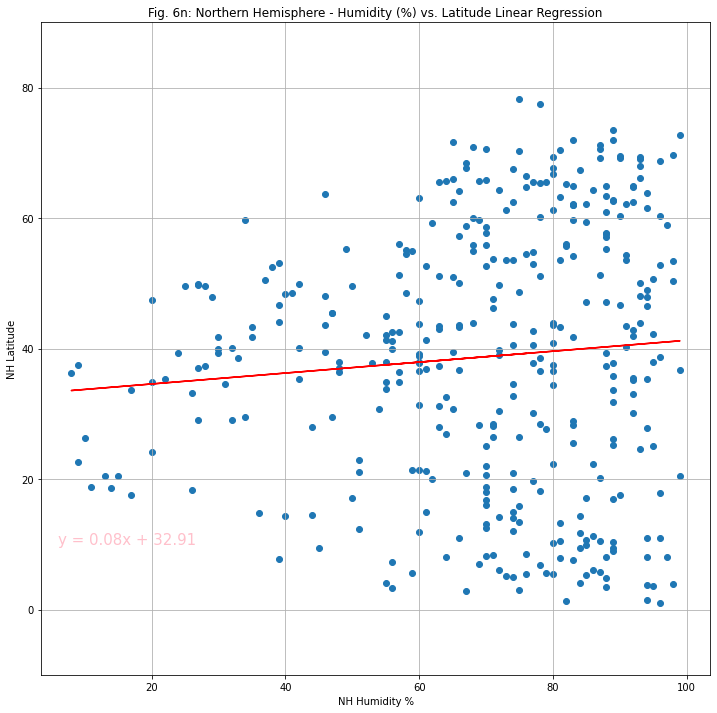

The correlation between humidity % and latitude is 0.09


In [54]:
fig_6n = plt.figure(figsize =(12, 12))

NH_hum = North_Hem_data['Humidity %']
NH_hum

x_values = NH_hum
y_values = NH_lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="pink")
plt.xlabel("NH Humidity %")
plt.ylabel("NH Latitude")
plt.ylim(-10,90)
plt.grid()
plt.title("Fig. 6n: Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Save the plotted figures as .jpgs
plt.savefig(r'./Resources/assets/images/Weather_Fig6n.jpg',pad_inches=0.2, dpi=72, bbox_inches='tight')
plt.show()

# Calculate the correlation coefficient
correlation_NH_hum = st.pearsonr(NH_hum,NH_lat)
print(f"The correlation between humidity % and latitude is {round(correlation_NH_hum[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

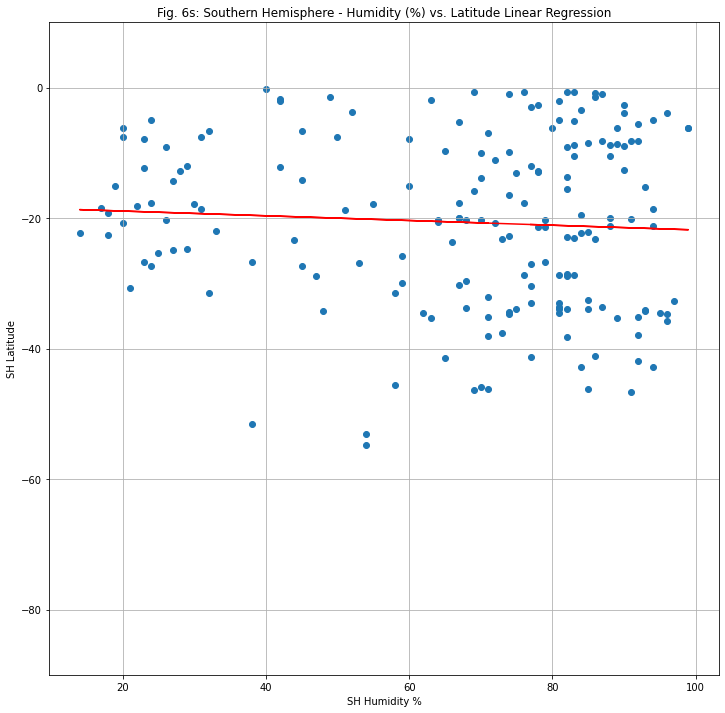

The correlation between humidity % and latitude is -0.06


In [55]:
fig_6s = plt.figure(figsize =(12, 12))

SH_hum = South_Hem_data['Humidity %']
SH_hum

x_values = SH_hum
y_values = SH_lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="pink")
plt.xlabel("SH Humidity %")
plt.ylabel("SH Latitude")
plt.ylim(-90,10)
plt.grid()
plt.title("Fig. 6s: Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Save the plotted figures as .jpgs
plt.savefig(r'./Resources/assets/images/Weather_Fig6s.jpg', pad_inches=0.2, dpi=72, bbox_inches='tight')
plt.show()

# Calculate the correlation coefficient
correlation_SH_hum = st.pearsonr(SH_hum,SH_lat)
print(f"The correlation between humidity % and latitude is {round(correlation_SH_hum[0],2)}")

### Analysis: Scatter plots 6n and 6s show no meaningful relationship between the Latitude and Humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

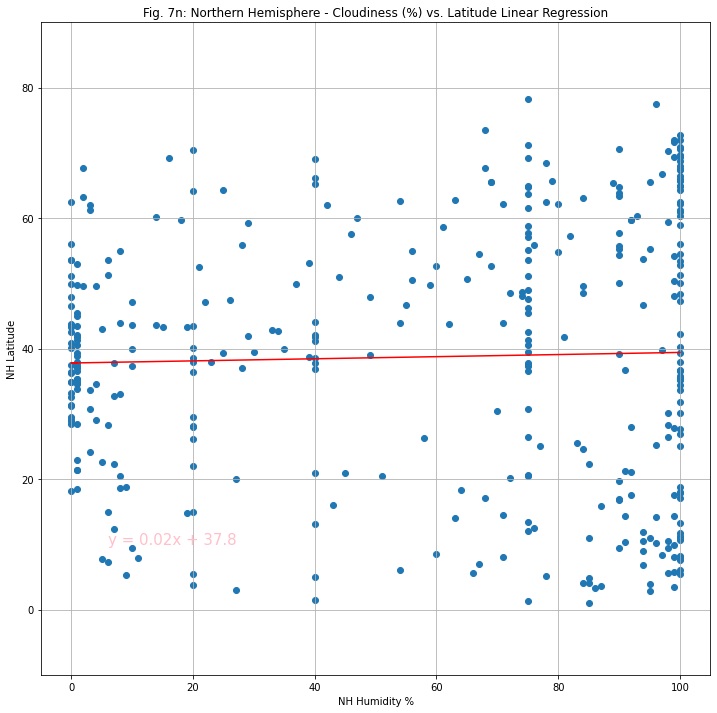

The correlation between cloudiness % and latitude is 0.09


In [56]:
fig_7n = plt.figure(figsize =(12, 12))

NH_clou = North_Hem_data['Cloudiness %']
NH_clou

x_values = NH_clou
y_values = NH_lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="pink")
plt.xlabel("NH Humidity %")
plt.ylabel("NH Latitude")
plt.ylim(-10,90)
plt.grid()
plt.title("Fig. 7n: Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Save the plotted figures as .jpgs
plt.savefig(r'./Resources/assets/images/Weather_Fig7n.jpg')
plt.show()

# Calculate the correlation coefficient
correlation_NH_hum = st.pearsonr(NH_hum,NH_lat)
print(f"The correlation between cloudiness % and latitude is {round(correlation_NH_hum[0],2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

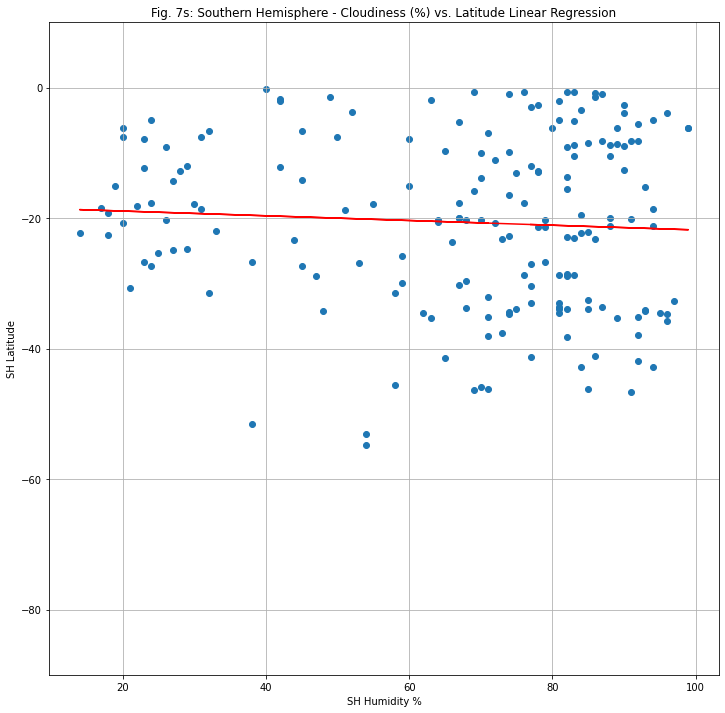

The correlation between cloudiness % and latitude is -0.06


In [57]:
fig_7s = plt.figure(figsize =(12, 12))

SH_clou = South_Hem_data['Humidity %']
SH_clou

x_values = SH_clou
y_values = SH_lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="pink")
plt.xlabel("SH Humidity %")
plt.ylabel("SH Latitude")
plt.ylim(-90,10)
plt.grid()
plt.title("Fig. 7s: Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Save the plotted figures as .jpgs
plt.savefig(r'./Resources/assets/images/Weather_Fig7s.jpg',pad_inches=0.2, dpi=72, bbox_inches='tight')
plt.show()

# Calculate the correlation coefficient
correlation_SH_clou = st.pearsonr(SH_clou,SH_lat)
print(f"The correlation between cloudiness % and latitude is {round(correlation_SH_clou[0],2)}")

### Analysis: Scatter plots 7n and 7s show no meaningful relationship between the Latitude and Humidity.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

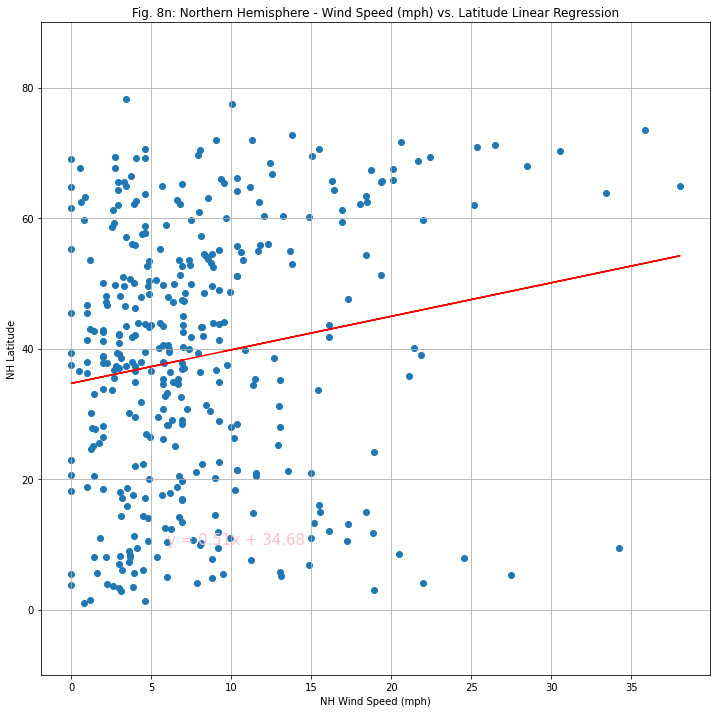

The correlation between wind speed and latitude is 0.17


In [58]:
fig_8n = plt.figure(figsize =(12, 12))

NH_wind = North_Hem_data['Wind Speed (mph)']
NH_wind

x_values = NH_wind
y_values = NH_lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="pink")
plt.xlabel("NH Wind Speed (mph)")
plt.ylabel("NH Latitude")
plt.ylim(-10,90)
plt.grid()
plt.title("Fig. 8n: Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Save the plotted figures as .jpgs
plt.savefig(r'./Resources/assets/images/Weather_Fig8n.jpg',pad_inches=0.2, dpi=72, bbox_inches='tight')
plt.show()

# Calculate the correlation coefficient
correlation_NH_wind = st.pearsonr(NH_wind,NH_lat)
print(f"The correlation between wind speed and latitude is {round(correlation_NH_wind[0],2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

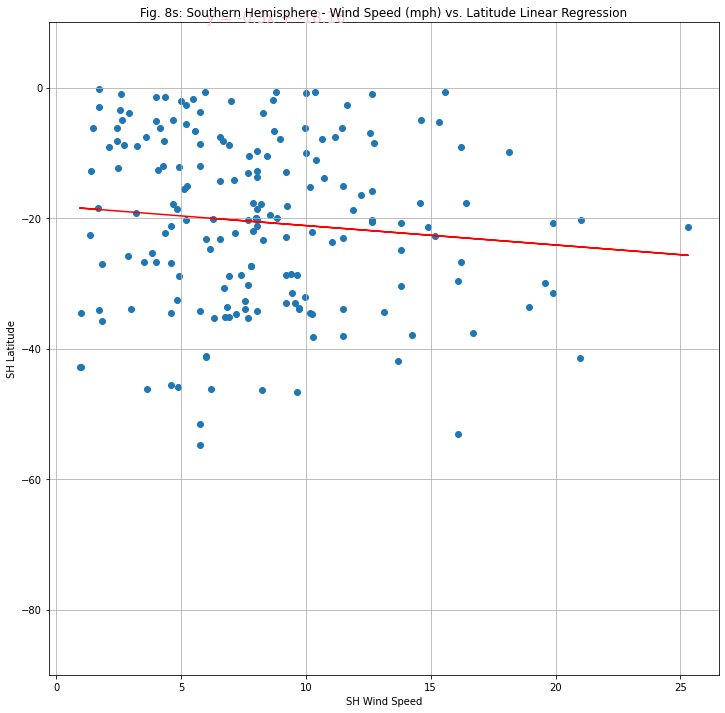

The correlation between wind speed and latitude is -0.06


In [59]:
fig_8s = plt.figure(figsize =(12, 12))

SH_wind = South_Hem_data['Wind Speed (mph)']
SH_wind

x_values = SH_wind
y_values = SH_lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="pink")
plt.xlabel("SH Wind Speed")
plt.ylabel("SH Latitude")
plt.ylim(-90,10)
plt.grid()
plt.title("Fig. 8s: Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Save the plotted figures as .jpgs
plt.savefig(r'./Resources/assets/images/Weather_Fig8s.jpg', pad_inches=0.2, dpi=72, bbox_inches='tight')
plt.show()

# Calculate the correlation coefficient
correlation_SH_wind = st.pearsonr(SH_wind,SH_lat)
print(f"The correlation between wind speed and latitude is {round(correlation_SH_clou[0],2)}")

### Analysis: Scatter plots 8n and 8s show no meaningful relationship between the Latitude and Wind Speed. Wind speeds are fairly evenly distributed across latitudes.